# Animations
In this notebook, we create animations of the particles in 2D and 3D space

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import matplotlib.gridspec as gridspec
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
from matplotlib.animation import FuncAnimation, writers, PillowWriter, FFMpegWriter
from copy import copy
from glob import glob
from datetime import timedelta
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore")

In [2]:
path_flow = '/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/'
Tfiles = sorted(glob(path_flow + 'psy4v3r1-daily_T_2019-01-*.nc'))

mesh_mask = xr.open_dataset('/storage/shared/oceanparcels/input_data/MOi/domain_ORCA0083-N006/coordinates.nc', decode_times=False)
flow = xr.open_dataset(Tfiles[10])


In [16]:
indices = {'lat': range(800, 1250), 'lon': range(3300, 4000)}

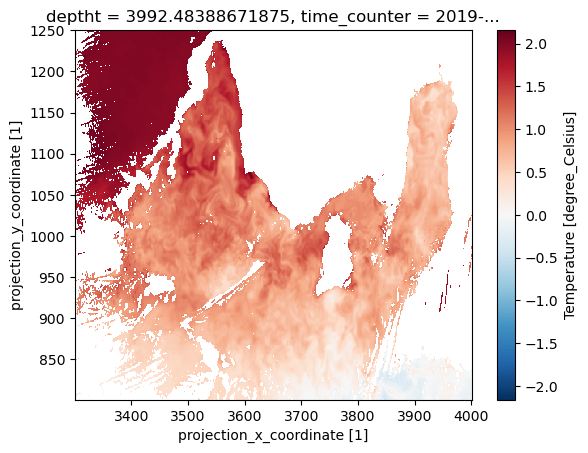

In [18]:
flow['votemper'][45, indices['lat'], indices['lon']].plot()

In [37]:
T_fields = np.zeros((len(Tfiles), len(indices['lat']), len(indices['lon'])))
time = np.zeros(len(Tfiles),dtype='datetime64[ns]')

indices = {'lat': range(800, 1250+1), 'lon': range(3300, 4000+1)}

lats = flow['nav_lat'][indices['lat'], indices['lon']].values
lons = flow['nav_lon'][indices['lat'], indices['lon']].values
lats -= lats[0,0] - lats[1,0]
lons -= lons[0,0] - lons[0,1]

indices = {'lat': range(800, 1250), 'lon': range(3300, 4000)}

In [38]:
for i, filename in enumerate(Tfiles):
    T = xr.open_dataset(filename)
    T_fields[i] = T['votemper'][45, indices['lat'], indices['lon']].values
    time[i] = T['time_counter'].values

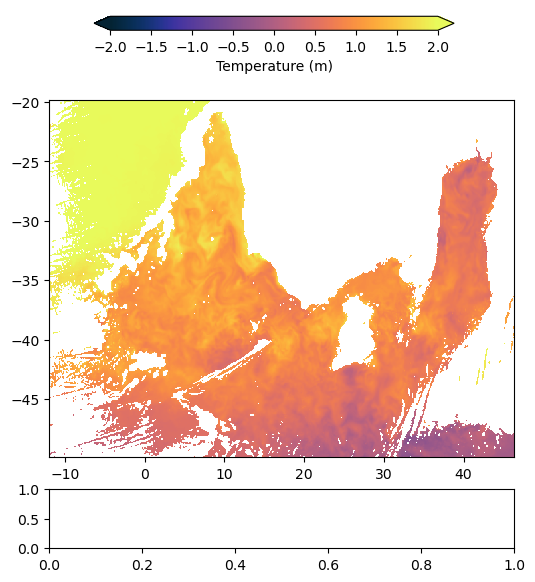

In [55]:
fig = plt.figure(figsize=(6,7))

gs = gridspec.GridSpec(3, 1, height_ratios=[1, 6, 1])

ax0 = plt.subplot(gs[0])
axs = plt.subplot(gs[2])
ax1 = plt.subplot(gs[1])

tracer = ax1.pcolormesh(lons, lats, T_fields[0], cmap='cmo.thermal', vmin=-2, vmax=2)


# diatoms_t = f(timerange_ns[0])
# pc = ax.pcolormesh(, , , cmap='cmo.algae', vmax=0.5, zorder=1, transform=ccrs.PlateCarree())

# ax1.coastlines()
# ax1.add_feature(cfeature.LAND, color='w',zorder=2)

# ax.scatter([0.03,0.03],[0.03,0.08],color=plt.get_cmap('cmo.matter')(150),s=[np.max(sqrtsizes)*1000,np.min(sqrtsizes)*1000], zorder=5, transform=ax.transAxes)

# size_text0 = ax.text(0.05, 0.05,'1 mm',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=13, color=plt.get_cmap('cmo.matter')(150)) # Initialise time ticker
# size_text1 = ax.text(0.05, 0.1,'10 um',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=13, color=plt.get_cmap('cmo.matter')(150)) # Initialise time ticker

# time_id = np.where(np.logical_and(times >= timerange[0],times < timerange[1])) # All trajectory data for a single day

# vmax=2000
# scatter = ax.scatter(lons[time_id].T,lats[time_id].T,c=depths[time_id].T,cmap='cmo.matter',marker='o',s=sqrtsizes*1000,linewidths=0.3, transform=ccrs.PlateCarree(),zorder=4,vmin=0,vmax=vmax)


# time_text = ax.text(0.03, 0.96,'time',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=14, bbox={'facecolor':'w', 'alpha':0.7, 'pad':5}, zorder=3) # Initialise time ticker

# ## Depth colorbar
# CB0 = plt.colorbar(scatter, cax=ax0,extend='max', orientation='horizontal')
# CB0.set_label('Depth [m]', fontsize=15)
# ax0.tick_params(labelsize=13)

## Algae colorbar
ax0.axis('off')
bar_ax = fig.add_axes([0.2, 0.85, 0.6, 0.02])
fig.colorbar(tracer, cax=bar_ax, orientation='horizontal', label='Temperature (m)', extend='both')

# def animate(i):
#     time_id = np.where(np.logical_and(times >= timerange[i],times < timerange[i+1]))
#     scatter.set_offsets(np.c_[lons[time_id].T, lats[time_id].T])
#     scatter.set_array(depths[time_id].T)
    
#     diatoms_t = f(timerange_ns[i])
#     pc.set_array(diatoms_t.ravel())
        
#     if i%2==0:
#         time_text.set_text(timedays[int(i/2)])  # Update the time
        
#     return time_text, scatter, pc,


# anim = FuncAnimation(fig, animate, frames = len(timerange)-10, interval=100, blit=True, repeat=True)

# # writergif = PillowWriter(fps=20, codec="libx264")
# # anim.save(region+'.gif', writer=writergif)

# plt.show()

## Global Equatorial Pacific

<IPython.core.display.Javascript object>


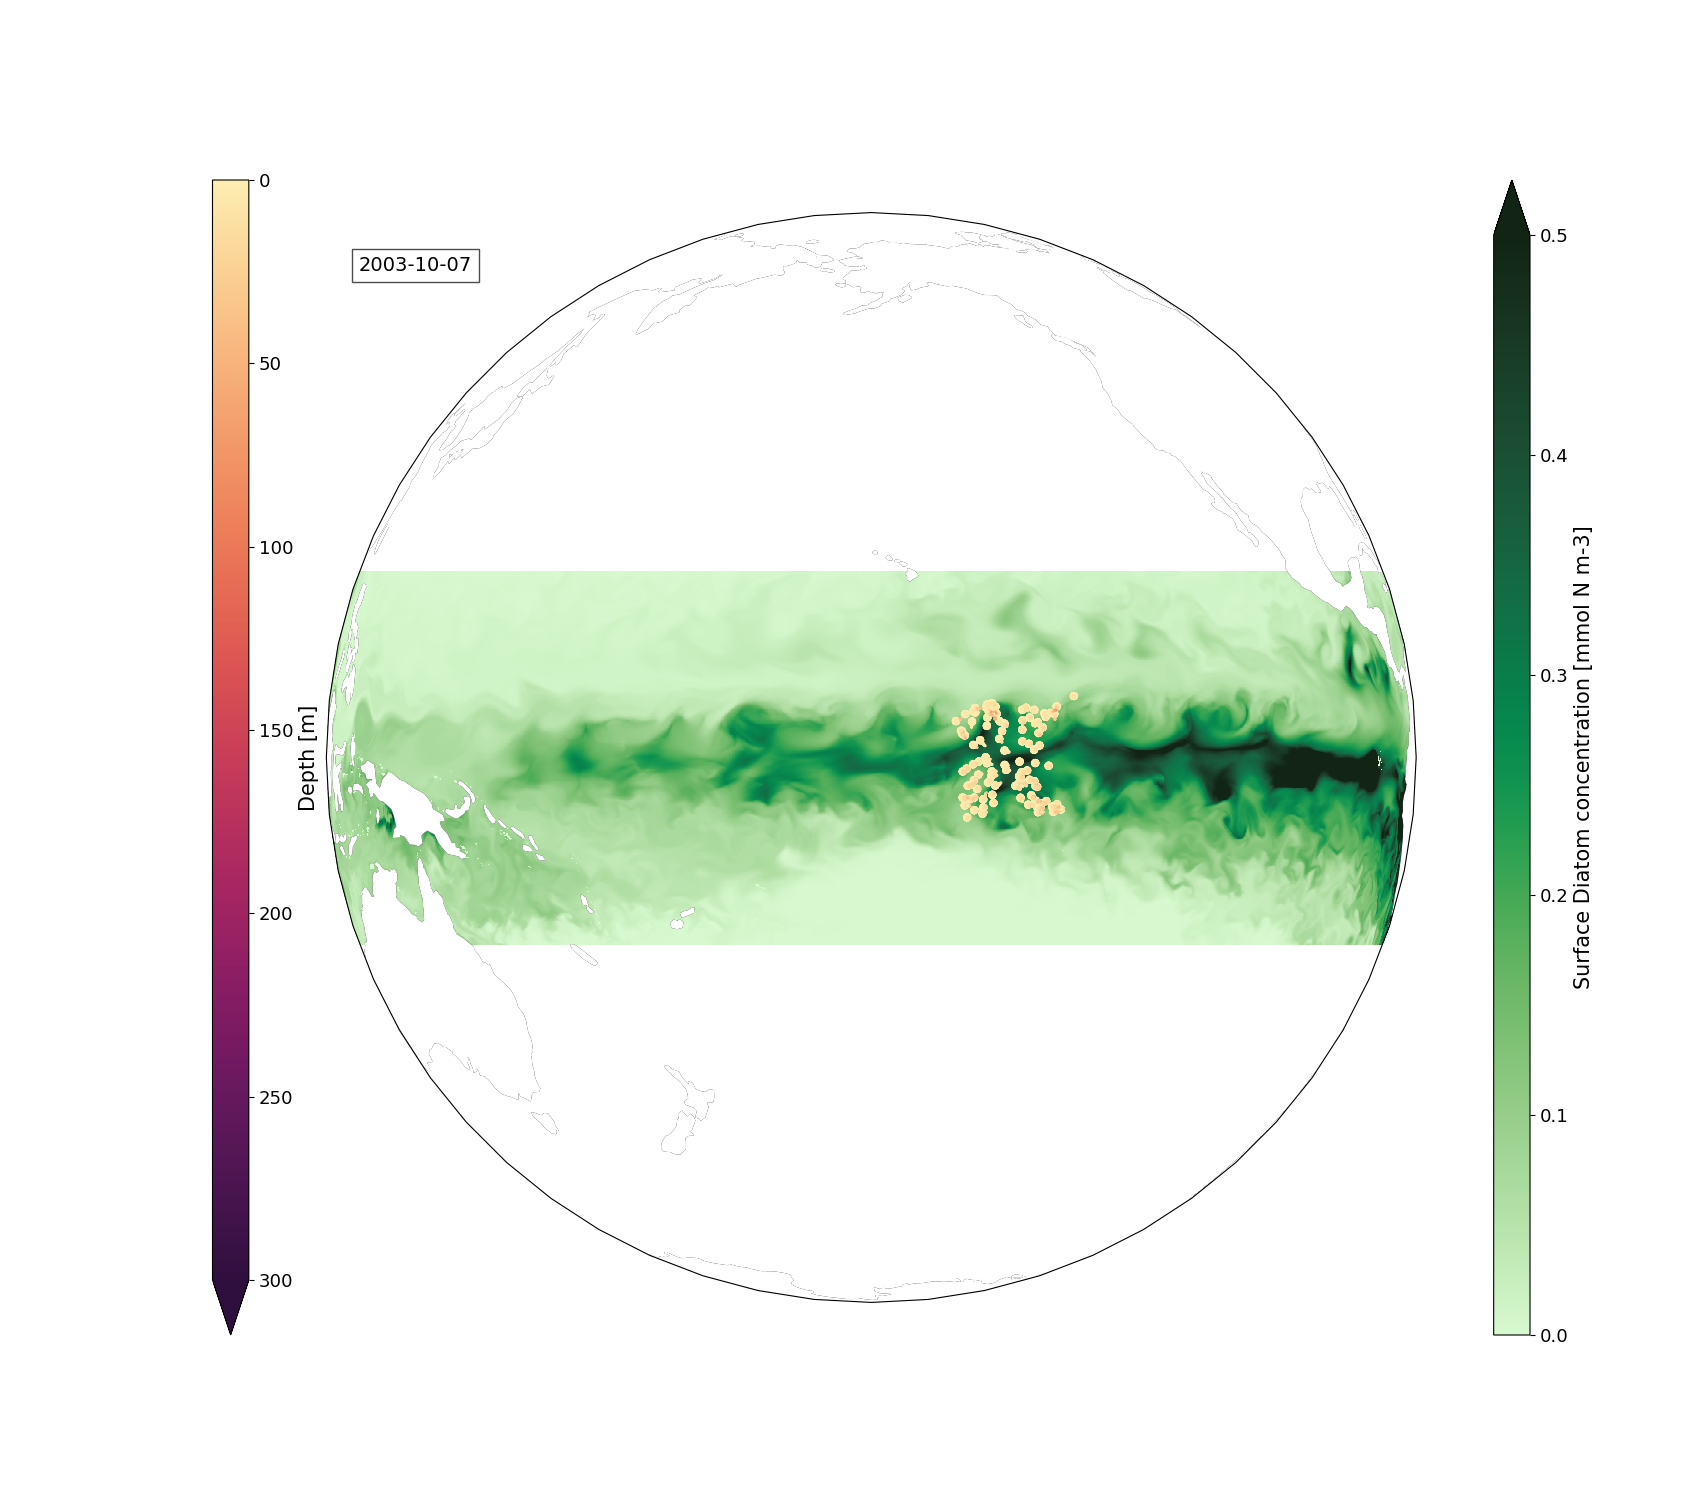

In [64]:
fig = plt.figure(figsize=(17,15))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 30, 1])

axcb0 = plt.subplot(gs[0])
axcb1 = plt.subplot(gs[2])
ax = plt.subplot(gs[1],projection=ccrs.Orthographic(central_longitude=-160))
ax.set_global()

diatoms_t = f(timerange_ns[0])
pc = ax.pcolormesh(mesh_mask['glamf'][0,jmin:jmax,imin:imax],mesh_mask['gphif'][0,jmin:jmax,imin:imax],diatoms_t, cmap='cmo.algae', vmax=0.5, zorder=1, transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.LAND, color='w',zorder=2)

time_id = np.where(np.logical_and(times >= timerange[0],times < timerange[1])) # All trajectory data for a single day

vmax=300
scatter = ax.scatter(lons[time_id].T,lats[time_id].T,c=depths[time_id].T,cmap='cmo.matter',marker='o',s=sqrtsizes*1000,linewidths=0.3, transform=ccrs.PlateCarree(),zorder=4,vmin=0,vmax=vmax)

time_text = ax.text(0.03, 0.96,'time',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=14, bbox={'facecolor':'w', 'alpha':0.7, 'pad':5}, zorder=3) # Initialise time ticker

## Depth colorbar
CB0 = plt.colorbar(scatter, cax=axcb0,extend='max')
CB0.set_label('Depth [m]', fontsize=15)
axcb0.tick_params(labelsize=13)
axcb0.invert_yaxis()

## Algae colorbar
CB1 = plt.colorbar(pc, cax=axcb1,extend='max')
CB1.set_label('Surface Diatom concentration [mmol N m-3]', fontsize=15)
axcb1.tick_params(labelsize=13)

def animate(i):
    time_id = np.where(np.logical_and(times >= timerange[i],times < timerange[i+1]))
    scatter.set_offsets(np.c_[lons[time_id].T, lats[time_id].T])
    scatter.set_array(depths[time_id].T)
    
    diatoms_t = f(timerange_ns[i])
    pc.set_array(diatoms_t.ravel())
        
    if i%2==0:
        time_text.set_text(timedays[int(i/2)])  # Update the time
        
    return scatter, pc, time_text,


anim = FuncAnimation(fig, animate, frames = len(timerange)-10, interval=100, blit=True, repeat=True)

# writergif = PillowWriter(fps=20, codec="libx264")
# anim.save(region+'.gif', writer=writergif)

plt.show()

## Global Southern Ocean

<IPython.core.display.Javascript object>


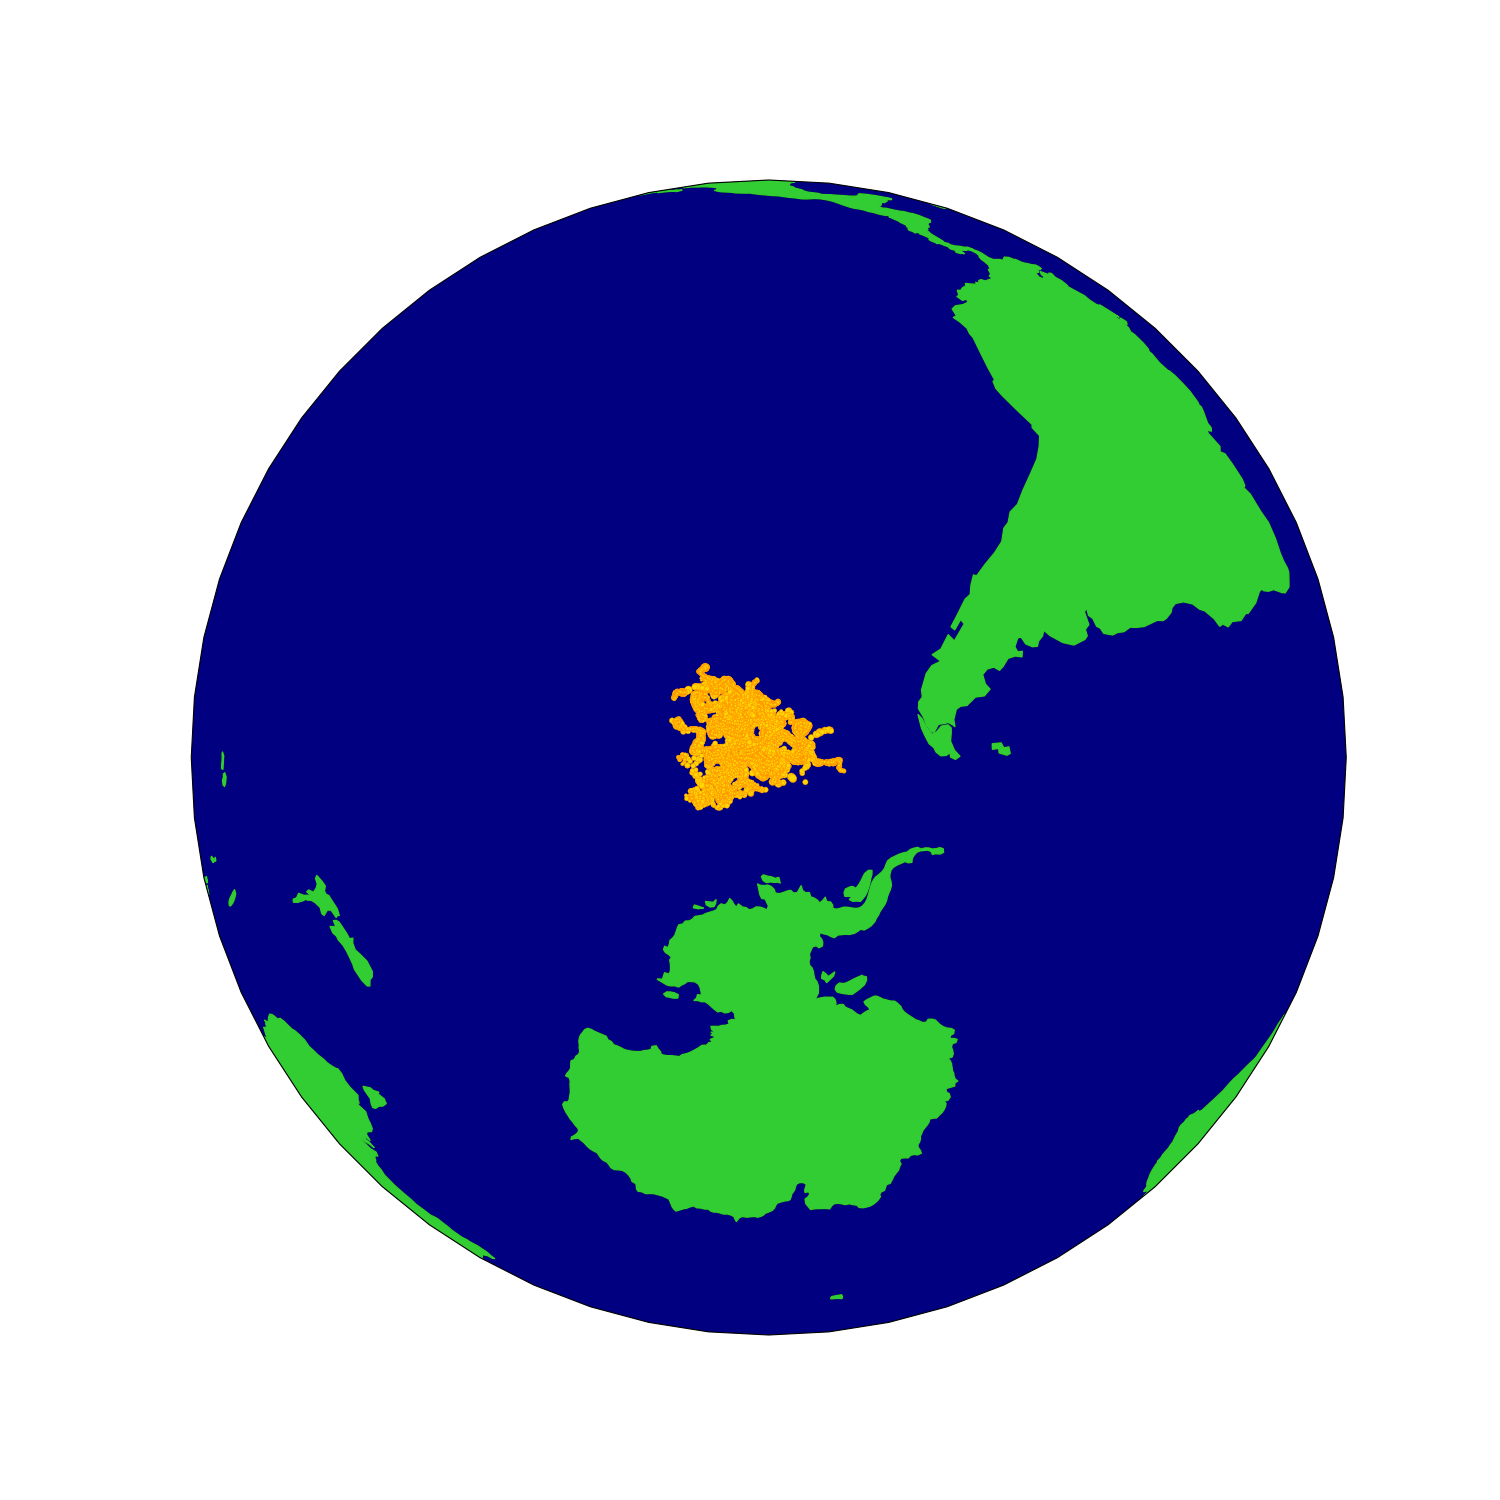

In [18]:
fig = plt.figure(figsize=(15,15))
# gs = gridspec.GridSpec(3, 1, height_ratios=[1, 18, 1])

# axcb0 = plt.subplot(gs[0])
# axcb1 = plt.subplot(gs[2])
# ax = plt.subplot(gs[1],projection=ccrs.Orthographic(central_longitude=180))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-100, central_latitude=-60))
ax.set_global()
# pc = ax.pcolormesh(mesh_mask['glamf'][0,jmin:jmax,imin:imax],mesh_mask['gphif'][0,jmin:jmax,imin:imax],diatoms[0,0], cmap='cmo.algae', vmax=0.5, zorder=1, transform=ccrs.PlateCarree())
ax.set_facecolor('navy')
ax.coastlines()
ax.add_feature(cfeature.LAND, color='limegreen',zorder=2)

# ax.scatter([0.03,0.03],[0.03,0.08],color=plt.get_cmap('cmo.matter')(150),s=[np.max(sqrtsizes)*1000,np.min(sqrtsizes)*1000], zorder=5, transform=ax.transAxes)

# size_text0 = ax.text(0.05, 0.05,'1 mm',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=13, color=plt.get_cmap('cmo.matter')(150)) # Initialise time ticker
# size_text1 = ax.text(0.05, 0.1,'10 um',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=13, color=plt.get_cmap('cmo.matter')(150)) # Initialise time ticker

time_id = np.where(np.logical_and(times >= timerange[0],times < timerange[1])) # All trajectory data for a single day

vmax=1000
scatter = ax.scatter(lons[time_id].T,lats[time_id].T,marker='o',s=sqrtsizes*1000,linewidths=0.3, transform=ccrs.PlateCarree(),zorder=4,color='gold', edgecolor='darkorange')#c=depths[time_id].T,cmap='cmo.matter',vmin=0,vmax=vmax)


# time_text = ax.text(0.03, 0.96,'time',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes, fontsize=14, bbox={'facecolor':'w', 'alpha':0.7, 'pad':5}, zorder=3) # Initialise time ticker

# ## Depth colorbar
# CB0 = plt.colorbar(scatter, cax=axcb0,extend='max', orientation='horizontal')
# CB0.set_label('Depth [m]', fontsize=15)
# axcb0.tick_params(labelsize=13)

# ## Algae colorbar
# CB1 = plt.colorbar(pc, cax=axcb1,extend='max', orientation='horizontal')
# CB1.set_label('Surface Diatom concentration [mmol N m-3]', fontsize=15)
# axcb1.tick_params(labelsize=13)

def animate(i):
    time_id = np.where(np.logical_and(times >= timerange[i],times < timerange[i+1]))
    scatter.set_offsets(np.c_[lons[time_id].T, lats[time_id].T])
#     scatter.set_array(depths[time_id].T)
    
#     if i%10==0:
#         pc.set_array(diatoms[int(i/10),int(i%10)].ravel())
        
#     if i%2==0:
#         time_text.set_text(timedays[int(i/2)])  # Update the time
        
    return scatter,# pc, #time_text,


anim = FuncAnimation(fig, animate, frames = len(timerange)-10, interval=100, blit=True, repeat=True)

# writergif = PillowWriter(fps=20, codec="libx264")
# anim.save(region+'.gif', writer=writergif)

plt.show()